In [5]:
#importing the required libraries
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.datasets import cifar10
from keras import optimizers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#Loading and preprocessing the CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10
input_shape = x_train.shape[1:]

In [4]:
num_classes = 10
input_shape = x_train.shape[1:4]
optimizer = optimizers.Adam(learning_rate=0.0003)

In [7]:
#training the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [8]:
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

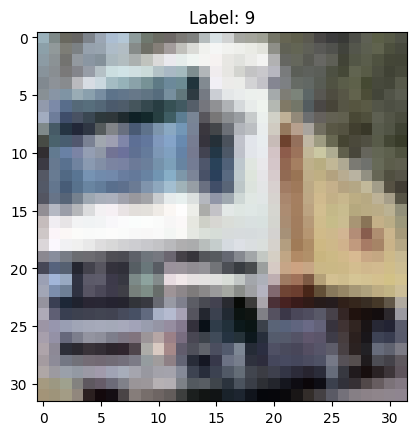

In [9]:
plt.imshow(x_train[1])
plt.title(f"Label: {y_train[1][0]}")
plt.show()


In [10]:
#Building the CNN model
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
optimizer = optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


<Figure size 1000x800 with 0 Axes>

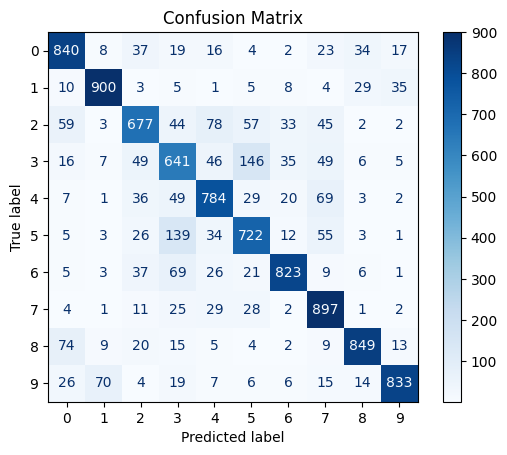

In [15]:
#plotting the confusion matrix of the data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict all test samples
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [12]:
history = model.fit(x_train, y_train_cat, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.2667 - loss: 1.9507 - val_accuracy: 0.4983 - val_loss: 1.3602
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.5114 - loss: 1.3471 - val_accuracy: 0.5994 - val_loss: 1.1135
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6259 - loss: 1.0596 - val_accuracy: 0.6625 - val_loss: 0.9495
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.6849 - loss: 0.8873 - val_accuracy: 0.7081 - val_loss: 0.8260
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7313 - loss: 0.7670 - val_accuracy: 0.7471 - val_loss: 0.7301
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7730 - loss: 0.6528 - val_accuracy: 0.7631 - val_loss: 0.6736
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8050 - loss: 0.5601 - val_accuracy: 0.7698 - val_loss: 0.6714
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8301 - loss: 0.4879 - 

In [13]:
#Evaluating the given model
test_loss, test_acc = model.evaluate(x_test, y_test_cat, batch_size=512)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - accuracy: 0.7985 - loss: 0.6216
Test Accuracy: 0.7966, Test Loss: 0.6199


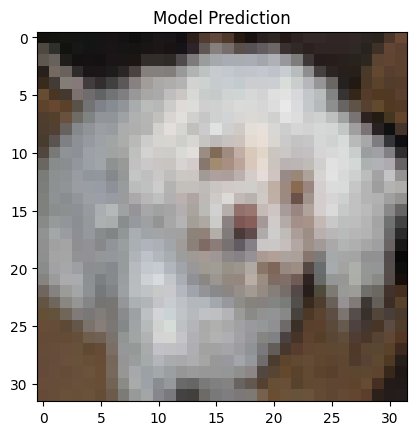

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: 5, True Label: 5


In [14]:
index = 1000
plt.imshow(x_test[index])
plt.title("Model Prediction")
plt.show()

prediction = model.predict(np.expand_dims(x_test[index], axis=0))
predicted_class = np.argmax(prediction)
print(f"Predicted Class: {predicted_class}, True Label: {y_test[index][0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


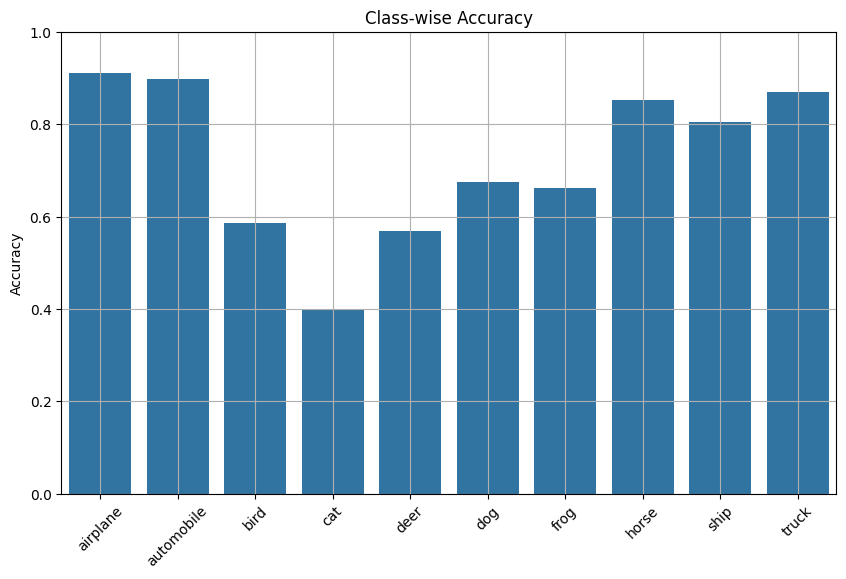

In [21]:
#took random examples of data and plotted the bar graph(i.e.,descriptive visualization)
import seaborn as sns
import numpy as np

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Predictions and ground truth
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.flatten()

# Calculate accuracy per class
class_correct = np.zeros(num_classes)
class_total = np.zeros(num_classes)

for i in range(len(y_true)):
    label = y_true[i]
    pred = y_pred[i]
    class_total[label] += 1
    if label == pred:
        class_correct[label] += 1

class_accuracy = class_correct / class_total

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_accuracy)
plt.title('Class-wise Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()


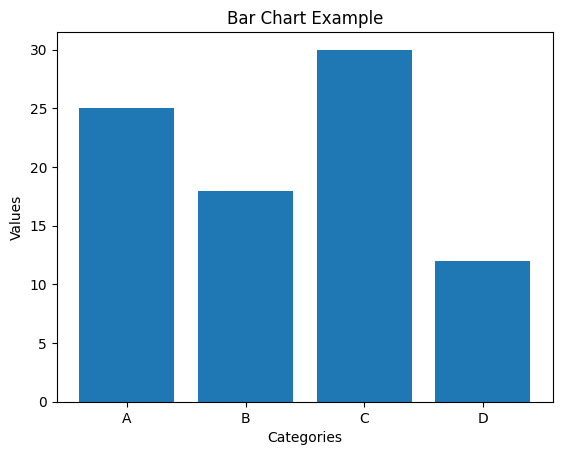

In [19]:
#took random examples of data and plotted the bar graph(i.e.,descriptive visualization)
import matplotlib.pyplot as plt
categories = ['A', 'B', 'C', 'D']
values = [25, 18, 30, 12]
plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart Example')
plt.show()